In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



In [2]:
#import dataset
df = pd.read_csv('acb.csv')
df = df[['Price']]
df = df.dropna() 
df = df.reset_index(drop=True)
df

,Price
0,11615.4
1,11585.5
2,11615.4
3,11615.4
4,12004.6
...,...
1480,22400.0
1481,22500.0
1482,22300.0
1483,22500.0


In [3]:
#check stationary
from statsmodels.tsa.stattools import adfuller
adf1 = adfuller(df['Price'], regression ='c', maxlag=30)
print("ADF stat: %f" % adf1[0])
print("p-value: %f" % adf1[1])

ADF stat: -1.232084
p-value: 0.659644


In [4]:
#differencing data
adf2 = adfuller(np.diff(df['Price']), regression ='n', maxlag=30)
print("ADF stat: %f" % adf2[0])
print("p-value: %f" % adf2[1])

ADF stat: -23.327839
p-value: 0.000000


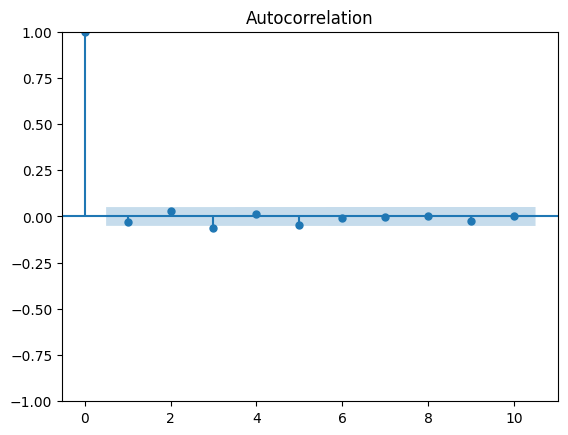

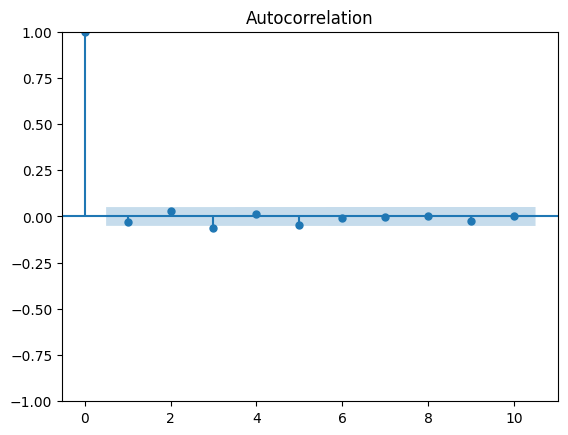

In [5]:
#ACF
sm.tsa.acf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_acf(np.diff(df['Price']),lags=10)

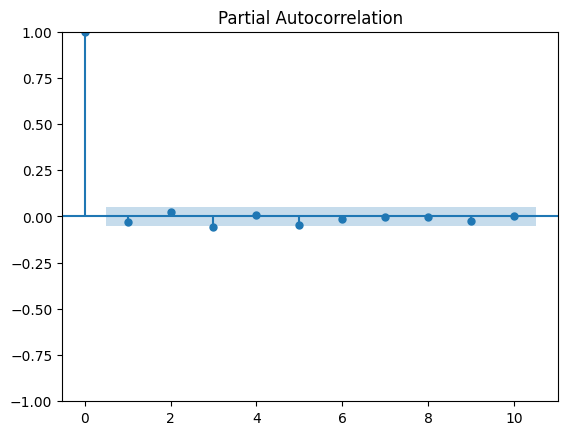

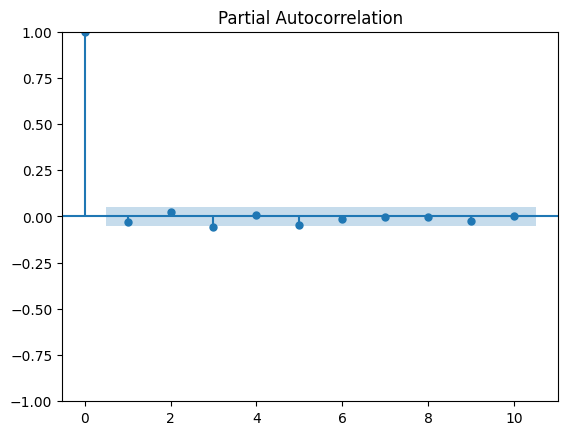

In [6]:
#PACF
sm.tsa.pacf(np.diff(df['Price']), nlags=10)
sm.graphics.tsa.plot_pacf(np.diff(df['Price']),lags=10)

In [7]:
#RATIO 7:3

In [8]:
#data splitting ratio: 7:3
train_size73 = int(0.7 * len(df))
test_size73 = int(0.3 * len(df)) 
train_data73 = df[:train_size73]
test_data73 = df[train_size73 : train_size73 + test_size73]

In [9]:
train_data73


,Price
0,11615.4
1,11585.5
2,11615.4
3,11615.4
4,12004.6
...,...
1034,26760.0
1035,27440.0
1036,26600.0
1037,26080.0


In [10]:
#Training data ratio 7:3
x_train73 = np.array(train_data73.index).reshape(-1, 1)
y_train73 = np.array(train_data73['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model73 = auto_arima(y_train73, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit73 = model73.fit(y_train73)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15076.780, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15080.519, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15080.048, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15080.412, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15080.231, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15074.809, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15074.940, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15075.209, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15077.238, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15075.197, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15074.725, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15074.364, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=15074.414, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15076.031, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0

In [11]:
x_train73

array([[   0],
       [   1],
       [   2],
       ...,
       [1036],
       [1037],
       [1038]], dtype=int64)

In [12]:
#Testing process ratio 7:3 
x_test73 = np.array(test_data73.index).reshape(-1, 1)
y_test73 = np.array(test_data73['Price'])
y_pred73 = model73.predict(n_periods=len(y_test73))

In [13]:
#creating prediction for next 30 days ratio 7:3
last_index73 =  df.index[-1]
last_data73 =pd.RangeIndex(start=last_index73, stop=last_index73+30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days73 = np.array(range(last_index73 + 1, last_index73 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days73 = model73.predict(len(x_next_30_days73))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days73)

Predicted prices for the next 30 days: 
[26111.25357651 26120.30112658 26115.66571358 26116.65165858
 26116.20553039 26116.31046543 26116.26710177 26116.27809515
 26116.27384648 26116.27498568 26116.27456677 26116.27468392
 26116.27464241 26116.27465439 26116.27465026 26116.27465148
 26116.27465106 26116.27465119 26116.27465115 26116.27465116
 26116.27465116 26116.27465116 26116.27465116 26116.27465116
 26116.27465116 26116.27465116 26116.27465116 26116.27465116
 26116.27465116 26116.27465116]


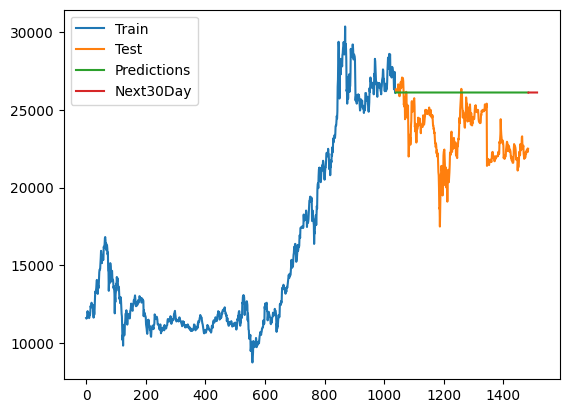

In [14]:
#Show plot ratio 7:3
plt.plot(train_data73.index, train_data73['Price'])
plt.plot(test_data73.index, test_data73['Price'])
plt.plot(test_data73.index, y_pred73)

plt.plot(last_data73,y_next_30_days73)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [15]:
#RATIO 8:2

In [16]:
#data splitting ratio: 8:2
train_size82 = int(0.8 * len(df))
test_size82 = int(0.2 * len(df)) 
train_data82 = df[:train_size82]
test_data82 = df[train_size82 : train_size82 + test_size82]

In [17]:
#Training data ratio 8:2
x_train82 = np.array(train_data82.index).reshape(-1, 1)
y_train82 = np.array(train_data82['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model82 = auto_arima(y_train82, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit82 = model82.fit(y_train82)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17356.112, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17359.638, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17360.551, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17360.683, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17357.861, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17355.824, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17357.758, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17355.063, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17355.891, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17357.108, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17353.259, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=17358.923, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=17358.794, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=17354.083, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0

In [19]:
#Testing process ratio 8:2 
x_test82 = np.array(test_data82.index).reshape(-1, 1)
y_test82 = np.array(test_data82['Price'])
y_pred82 = model82.predict(n_periods=len(y_test82))

In [20]:
#creating prediction for next 30 days ratio 8:2
last_index82 =  df.index[-1]
last_data82 =pd.RangeIndex(start=last_index82, stop=last_index82 + 30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days82 = np.array(range(last_index82 + 1, last_index82 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days82 = model82.predict(len(x_next_30_days82))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days82)

Predicted prices for the next 30 days: 
[17549.77677515 17502.94745379 17547.00385022 17505.55618432
 17544.54959158 17507.86511787 17542.37737792 17509.9087073
 17540.45479643 17511.71744614 17538.75315924 17513.31832355
 17537.24707527 17514.73522711 17535.91407143 17515.98929921
 17534.73425725 17517.09925255 17533.69002806 17518.08164934
 17532.76580236 17518.95114847 17531.94778926 17519.7207242
 17531.22378275 17520.4018598  17530.58297953 17521.00471886
 17530.01581782 17521.53829698]


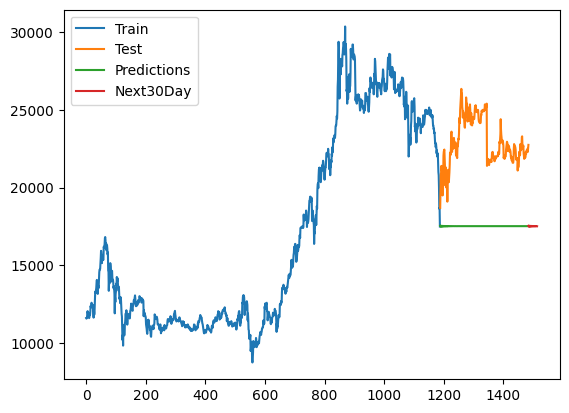

In [21]:
#Show plot ratio 8:2
plt.plot(train_data82.index, train_data82['Price'])
plt.plot(test_data82.index, test_data82['Price'])
plt.plot(test_data82.index, y_pred82)

plt.plot(last_data82,y_next_30_days82)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [22]:
#RATIO 9:1

In [23]:
#data splitting ratio: 9:1
train_size91 = int(0.9 * len(df))
test_size91 = int(0.1 * len(df)) 
train_data91 = df[:train_size91]
test_data91 = df[train_size91 : train_size91+ test_size91]

In [24]:
#Training data ratio 9:1
x_train91 = np.array(train_data91.index).reshape(-1, 1)
y_train91 = np.array(train_data91['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model91 = auto_arima(y_train91, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit91 = model91.fit(y_train91)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19643.329, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19642.126, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19643.525, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19643.563, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19641.062, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19639.865, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19641.568, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19641.616, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19644.452, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=19644.227, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=19638.840, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=19642.541, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=19642.506, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=19640.344, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0

In [25]:
#Testing process ratio 9:1 
x_test91 = np.array(test_data91.index).reshape(-1, 1)
y_test91 = np.array(test_data91['Price'])
y_pred91 = model91.predict(n_periods=len(y_test91))

In [26]:
#creating prediction for next 30 days ratio 9:1
last_index91 =  df.index[-1]
last_data91 =pd.RangeIndex(start=last_index91, stop=last_index91 + 30, step=1)

#create an array of 30 integers starting from last index
x_next_30_days91 = np.array(range(last_index91 + 1, last_index91 + 31)).reshape(-1, 1)

#predict the price for the next 30 days.
y_next_30_days91 = model91.predict(len(x_next_30_days91))

#print the prices for the next 30 days.
print('Predicted prices for the next 30 days: ')
print(y_next_30_days91)

Predicted prices for the next 30 days: 
[24984.6155951  24998.51023235 24985.96109928 24997.29502171
 24987.05863351 24996.30376855 24987.95389746 24995.49519858
 24988.68416857 24994.83564416 24989.27985423 24994.29764245
 24989.76575788 24993.85879187 24990.16211183 24993.50081934
 24990.48541966 24993.20881943 24990.7491434  24992.97063369
 24990.96426413 24992.77634444 24991.13973914 24992.61786177
 24991.28287495 24992.48858669 24991.39963152 24992.38313638
 24991.49487042 24992.29712006]


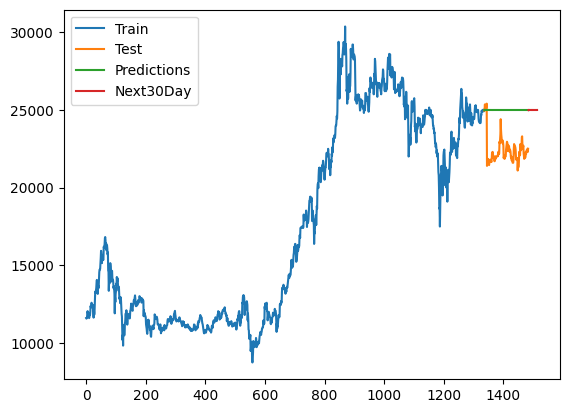

In [27]:
#Show plot ratio 9:1
plt.plot(train_data91.index, train_data91['Price'])
plt.plot(test_data91.index, test_data91['Price'])
plt.plot(test_data91.index, y_pred91)

plt.plot(last_data91,y_next_30_days91)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [28]:
#ACCURACY EVALUATION

In [29]:
#method to calculate mape
def calc_mape(actual, predicted):

    # Convert to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate absolute percentage error
    absolute_error = np.abs((actual - predicted) / actual)
    
    # Handle division by zero cases
    absolute_error[np.isinf(absolute_error)] = 0.0
    
    # Calculate mean absolute percentage error
    mape = np.mean(absolute_error) * 100
    
    return mape

In [42]:
#accuracy evaluate 7:3
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import explained_variance_score as evs

test_rmse73 = np.sqrt(np.mean((y_pred73 - y_test73)**2))
test_mape73 = calc_mape(y_test73, y_pred73)
test_mae73 = mae(y_test73, y_pred73)
test_msle73 = msle(y_test73, y_pred73)
test_evs73 = evs(y_test73, y_pred73)

print(test_rmse73)
print(test_mape73)
print(test_mae73)
print(test_msle73)
print(test_evs73)

3166.787012552148
12.244163559837942
2738.0836008113984
0.01757953787218696
-6.907813856038558e-06


In [43]:
#accuracy evaluate 8:2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import explained_variance_score as evs

test_rmse82 = np.sqrt(np.mean((y_pred82 - y_test82)**2))
test_mape82 = calc_mape(y_test82, y_pred82)
test_mae82 = mae(y_test82, y_pred82)
test_msle82 = msle(y_test82, y_pred82)
test_evs82 = evs(y_test82, y_pred82)

print(test_rmse82)
print(test_mape82)
print(test_mae82)
print(test_msle82)
print(test_evs82)

5591.790868548555
23.24273102608225
5398.889531199306
0.07505205088383202
-0.00018133443997458976


In [44]:
#accuracy evaluate 9:1
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import explained_variance_score as evs
test_rmse91 = np.sqrt(np.mean((y_pred91 - y_test91)**2))
test_mape91 = calc_mape(y_test91, y_pred91)
test_mae91 = mae(y_test91, y_pred91)
test_msle91 = msle(y_test91, y_pred91)
test_evs91 = evs(y_test91, y_pred91)

print(test_rmse91)
print(test_mape91)
print(test_mae91)
print(test_msle91)
print(test_evs91)

2727.8510347309725
11.786064104246933
2608.278836354044
0.013485210855004065
-0.000333832976112447
